In [5]:
import requests
import os
from dotenv import load_dotenv

load_dotenv()

LANDAI_API_KEY = os.getenv('LANDAI_API_KEY')

if not LANDAI_API_KEY:
    raise ValueError("Please set the environment key")

url = "https://api.landing.ai/v1/tools/document-analysis"

path_to_image = "salary_slip.jpg"

files = {
    "image": open(path_to_image, "rb")
}

data = {
    "parse_text": True,
    "parse_tables": True,
    "parse_figures": True,
    "summary_verbosity": "normal",
    "caption_format": "json",
    "response_format": "json",
    "return_chunk_crops": False,
    "return_page_crops": False
}

headers = {
    "Authorization": f"Basic {LANDAI_API_KEY}"
}

response = requests.post(url, files=files, data=data, headers=headers)

if response.status_code == 200:
    print(response.json())
else:
    print(f"Error: {response.status_code}")
    print(response.text)

{'data': {'pages': [{'bbox': [0, 0, 564, 478], 'order': 0, 'chunks': [{'bbox': [203, 32, 327, 51], 'label': 'section_header', 'order': 32, 'caption': 'SALARY SLIP', 'summary': 'The content is a simple text that reads "SALARY SLIP."', 'crop_b64': None}, {'bbox': [393, 41, 516, 59], 'label': 'text', 'order': 41, 'caption': 'CONFIDENTIAL', 'summary': 'CONFIDENTIAL', 'crop_b64': None}, {'bbox': [25, 42, 137, 58], 'label': 'text', 'order': 42, 'caption': 'exceltemplate.NET', 'summary': 'The image contains the text "exceltemplate.NET".', 'crop_b64': None}, {'bbox': [230, 62, 298, 75], 'label': 'text', 'order': 62, 'caption': 'Januar 2018', 'summary': 'The text extracted from the image is "Januar 2018."', 'crop_b64': None}, {'bbox': [395, 86, 490, 101], 'label': 'text', 'order': 86, 'caption': 'Cleaning Service Staff', 'summary': 'The text extracted from the image is "Cleaning Service Staff."', 'crop_b64': None}, {'bbox': [146, 87, 220, 101], 'label': 'text', 'order': 87, 'caption': 'Wayne Do

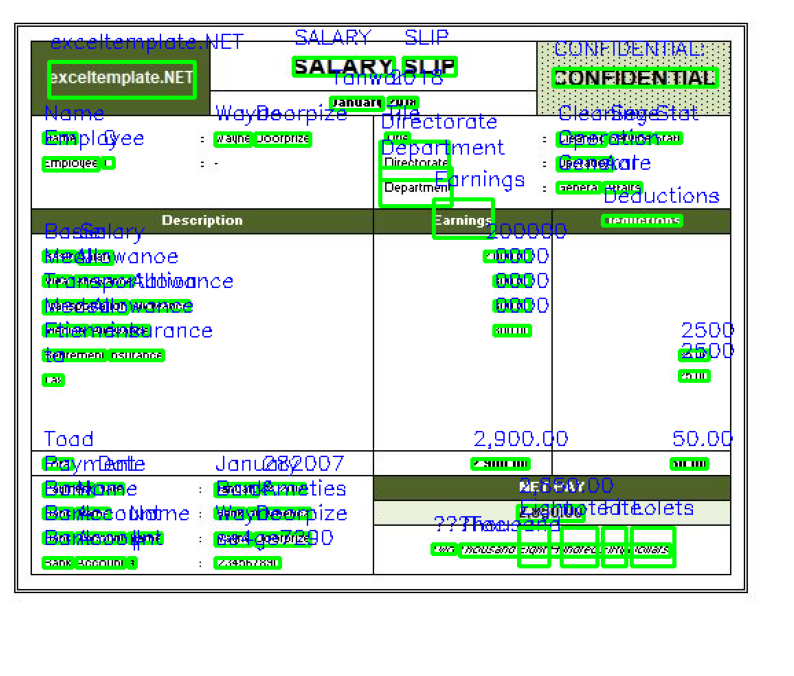

In [ ]:
#sudo apt install tesseract-ocr
#pip install pytesseract


import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

image_path = "salary_slip.jpg"

image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

detection_data = pytesseract.image_to_data(gray, output_type=Output.DICT)

for i in range(len(detection_data['text'])):
    x, y, w, h = detection_data['left'][i], detection_data['top'][i], detection_data['width'][i], detection_data['height'][i]
    te   xt = detection_data['text'][i]
    if text.strip():# only processed non-empty text
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



In [8]:
# Importing required libraries
import requests
import os
from dotenv import load_dotenv
import cv2
import matplotlib.pyplot as plt

# Load environment variables
load_dotenv()

LANDAI_API_KEY = os.getenv('LANDAI_API_KEY')
if not LANDAI_API_KEY:
    raise ValueError("Please set the environment key")

# API Endpoint
url = "https://api.landing.ai/v1/tools/document-analysis"

# Path to input image
path_to_image = "salary_slip.jpg"

files = {"image": open(path_to_image, "rb")}

data = {
    "parse_text": True,
    "parse_tables": True,
    "parse_figures": True,
    "summary_verbosity": "normal",
    "caption_format": "json",
    "response_format": "json",
    "return_chunk_crops": False,#pip install requests
#pip install python-dotenv

import requests
import os
from dotenv import load_dotenv
import cv2
import matplotlib.pyplot as plt

load_dotenv()

LANDAI_API_KEY = os.getenv('LANDAI_API_KEY')
if not LANDAI_API_KEY:
    raise ValueError("Please set the environment key")

url = "https://api.landing.ai/v1/tools/document-analysis"

path_to_image = "salary_slip.jpg"

files = {"image": open(path_to_image, "rb")}

data = {
    "parse_text": True,
    "parse_tables": True,
    "parse_figures": True,
    "summary_verbosity": "normal",
    "caption_format": "json",
    "response_format": "json",
    "return_chunk_crops": False,
    "return_page_crops": False
}

headers = {"Authorization": f"Basic {LANDAI_API_KEY}"}

response = requests.post(url, files=files, data=data, headers=headers)

if response.status_code == 200:
    response_json = response.json()

    image = cv2.imread(path_to_image)

    if "predictions" in response_json:
        predictions = response_json["predictions"]

        for pred in predictions:
            if "boundingBox" in pred:
                x1, y1, x2, y2 = pred["boundingBox"]["x1"], pred["boundingBox"]["y1"], pred["boundingBox"]["x2"], pred["boundingBox"]["y2"]
                label = pred.get("text", "Text ")

                h, w, _ = image.shape
                x1, y1, x2, y2 = int(x1 * w), int(y1 * h), int(x2 * w), int(y2 * h)

                cv2.rectangel(image, (x1, y1), (x2,  y2), (0, 255, 0), 2)
                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

else:
    print(f"Error : {response.status_code}")
    print(response.text)                
    "return_page_crops": False
}

headers = {"Authorization": f"Basic {LANDAI_API_KEY}"}

response = requests.post(url, files=files, data=data, headers=headers)

if response.status_code == 200:
    response_json = response.json()

    # Load the image
    image = cv2.imread(path_to_image)

    # Check for parsed data in the JSON response
    if "data" in response_json and "pages" in response_json["data"]:
        pages = response_json["data"]["pages"]

        for page in pages:
            if "chunks" in page:
                chunks = page["chunks"]

                for chunk in chunks:
                    # Extract bounding box and label
                    if "bbox" in chunk:
                        bbox = chunk["bbox"]
                        label = chunk.get("caption", "Text")

                        # Convert bounding box to image coordinates
                        x1, y1, x2, y2 = bbox
                        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle
                        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)  # Add text

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

else:
    print(f"Error: {response.status_code}")
    print(response.text)


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'text'
>  - Can't convert object to 'str' for 'text'
